# 1. Uvod


## Opis problema

Finansijske institucije trpe značajne gubitke zbog neplaćanja auto kredita. Ovo je dovelo do pooštravanja kriterijuma za odobravanje auto kredita i povećanja stope odbijanja zahteva za kredit. Potreba za boljim modelom za ocenjivanje kreditnog rizika je takođe postala očigledna. Ovo zahteva istraživanje kako bi se procenile determinante neplaćanja auto kredita. Finansijska institucija vas je angažovala da tačno predvidite verovatnoću da korisnik kredita neće platiti prvu ratu auto kredita na vreme. Sledeće informacije o kreditu i korisniku kredita su dostupne u datasetovima:
- 	Informacije o korisniku kredita (demografski podaci kao što su starost, dokaz o identitetu itd.)
-	Informacije o kreditu (detalji o isplati kredita, odnos vrednosti kredita prema vrednosti vozila itd.)
-	Podaci iz kreditnog biroa i istorija (kreditni skor, broj aktivnih računa, status drugih kredita, kreditna istorija itd.)

Na ovaj način će se osigurati da klijenti koji su sposobni za otplatu kredita ne budu odbijeni, a važni faktori se mogu identifikovati i dalje koristiti za minimiziranje stope neplaćanja.


## Koji su izazovi u resavanju problema (kasnije bolje)

1.	Nedostatak podataka: Mnogi podaci mogu biti nepotpuni ili netačni, što otežava precizno modeliranje.
2.	Balansiranje podataka: Distribucija ciljne promenljive (neplaćanje kredita) je neizbalansirana, sa mnogo više negativnih (plaćenih) nego pozitivnih (neplaćenih) primera.
3.	Identifikacija ključnih faktora: Identifikacija i selekcija relevantnih karakteristika koje utiču na neplaćanje kredita.
4.	Vremenska komponenta: Promene u ekonomskim uslovima tokom vremena mogu značajno uticati na ponašanje korisnika kredita.


## Zašto je bitan

Precizno predviđanje neplaćanja auto kredita je važno iz više razloga:

1.	Finansijska stabilnost: Smanjuje finansijske gubitke za banke i druge finansijske institucije.
2.	Poboljšanje procesa odobravanja kredita: Omogućava pravedniji i efikasniji proces odobravanja kredita, smanjujući broj neopravdano odbijenih kredita.
3.	Povećanje poverenja klijenata: Poboljšava odnos sa klijentima pružajući im bolje usluge i proizvode.

## Kome je bitan

1.	Finansijskim institucijama: Pomaže bankama i kreditnim institucijama da smanje gubitke i optimizuju svoje kreditne procese.
2.	Auto salonima: Omogućava im da ponude kvalitetnija vozila svojim kupcima i smanje rizik loših kupovina.
3.	Kupcima: Povećava poverenje kupaca u kvalitet vozila koja kupuju i u fer kreditne uslove.
4.	Regulatornim telima: Pomaže u stvaranju politika i regulativa koje poboljšavaju stabilnost finansijskog sistema.

U zaključku, razvoj tačnog modela za predviđanje neplaćanja auto kredita može doneti brojne benefite različitim zainteresovanim stranama, poboljšavajući ukupnu efikasnost i stabilnost finansijskog tržišta.


# 2. Analiza podataka

## Importovanje podataka i biblioteka

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
dictionary = pd.read_csv('data_dictionary.csv')
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

Podatke ćemo držati razdvojene i za vreme analize i pripreme kako bismo izbegli curenje informacija

## Opis atributa

 **Informacije o korisniku kredita**

1.	UniqueID: Identifikator za korisnike.
2.	Current_pincode: Poštanski broj trenutne adrese korisnika.
3.	Date.of.Birth: Datum rođenja korisnika.
4.	Employment.Type: Tip zaposlenja korisnika (Salaried/Self Employed).
5.	MobileNo_Avl_Flag: Indikator da li je korisnik podelio broj mobilnog telefona (1 - da, 0 - ne).
6.	Aadhar_flag: Indikator da li je korisnik podelio Aadhar broj (1 - da, 0 - ne).
7.	PAN_flag: Indikator da li je korisnik podelio PAN broj (1 - da, 0 - ne).
8.	VoterID_flag: Indikator da li je korisnik podelio broj biračke kartice (1 - da, 0 - ne).
9.	Driving_flag: Indikator da li je korisnik podelio broj vozačke dozvole (1 - da, 0 - ne).
10.	Passport_flag: Indikator da li je korisnik podelio broj pasoša (1 - da, 0 - ne).

**Informacije o kreditu**

11.	loan_default: Indikator neplaćanja prve rate kredita na datum dospeća. (Zavisna varijbla - Output)
12.	disbursed_amount: Iznos kredita koji je odobren i isplaćen korisniku.
13.	asset_cost: Cena imovine za koju je kredit uzet.
14.	ltv (Loan to Value): Odnos vrednosti kredita prema vrednosti imovine.
15.	branch_id: Identifikator filijale gde je kredit odobren.
16.	supplier_id: Identifikator prodavca vozila gde je kredit odobren.
17.	manufacturer_id: Identifikator proizvođača vozila (Hero, Honda, TVS itd.).
18.	DisbursalDate: Datum kada je kredit odobren.
19.	State_ID: Identifikator države gde je kredit odobren.
20.	Employee_code_ID: Identifikator zaposlenog koji je registrovao odobravanje kredita.
21.	PRIMARY.INSTAL.AMT: Iznos mesečne rate za primarni kredit.
22.	SEC.INSTAL.AMT: Iznos mesečne rate za sekundarni kredit.

**Podaci iz kreditnog biroa i istorija**

23.	PERFORM_CNS.SCORE: Kreditni skor korisnika iz kreditnog biroa.
24.	PERFORM_CNS.SCORE.DESCRIPTION: Opis kreditnog skora iz kreditnog biroa.
25.	PRI.NO.OF.ACCTS: Broj primarnih kredita koje je korisnik uzeo do trenutka odobrenja.
26.	PRI.ACTIVE.ACCTS: Broj aktivnih primarnih kredita koje korisnik ima.
27.	PRI.OVERDUE.ACCTS: Broj primarnih kredita sa kašnjenjem u otplati.
28.	PRI.CURRENT.BALANCE: Ukupan iznos glavnice koji je ostao za otplatu na aktivnim primarnim kreditima.
29.	PRI.SANCTIONED.AMOUNT: Ukupan iznos koji je odobren za sve primarne kredite.
30.	PRI.DISBURSED.AMOUNT: Ukupan iznos koji je isplaćen za sve primarne kredite.
31.	SEC.NO.OF.ACCTS: Broj sekundarnih kredita koje je korisnik uzeo.
32.	SEC.ACTIVE.ACCTS: Broj aktivnih sekundarnih kredita koje korisnik ima.
33.	SEC.OVERDUE.ACCTS: Broj sekundarnih kredita sa kašnjenjem u otplati.
34.	SEC.CURRENT.BALANCE: Ukupan iznos glavnice koji je ostao za otplatu na aktivnim sekundarnim kreditima.
35.	SEC.SANCTIONED.AMOUNT: Ukupan iznos koji je odobren za sve sekundarne kredite.
36.	SEC.DISBURSED.AMOUNT: Ukupan iznos koji je isplaćen za sve sekundarne kredite.
37.	NEW.ACCTS.IN.LAST.SIX.MONTHS: Broj novih kredita koje je korisnik uzeo u poslednjih šest meseci.
38.	DELINQUENT.ACCTS.IN.LAST.SIX.MONTHS: Broj kredita sa kašnjenjem u otplati u poslednjih šest meseci.
39.	AVERAGE.ACCT.AGE: Prosečno trajanje kredita korisnika.
40.	CREDIT.HISTORY.LENGTH: Dužina kreditne istorije korisnika.
41.	NO.OF_INQUIRIES: Broj upita koje je korisnik imao za kredite.


In [3]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 233154 entries, 0 to 233153
Data columns (total 41 columns):
 #   Column                               Non-Null Count   Dtype  
---  ------                               --------------   -----  
 0   UniqueID                             233154 non-null  int64  
 1   disbursed_amount                     233154 non-null  int64  
 2   asset_cost                           233154 non-null  int64  
 3   ltv                                  233154 non-null  float64
 4   branch_id                            233154 non-null  int64  
 5   supplier_id                          233154 non-null  int64  
 6   manufacturer_id                      233154 non-null  int64  
 7   Current_pincode_ID                   233154 non-null  int64  
 8   Date.of.Birth                        233154 non-null  object 
 9   Employment.Type                      225493 non-null  object 
 10  DisbursalDate                        233154 non-null  object 
 11  State_ID     

## Analiza podataka

### Deskriptivna statistika

In [4]:
num_col = train.select_dtypes(include=['number']).columns
cat_col = train.select_dtypes(include=['object']).columns

In [5]:
train[num_col].describe()

,UniqueID,disbursed_amount,asset_cost,ltv,branch_id,supplier_id,manufacturer_id,Current_pincode_ID,State_ID,Employee_code_ID,...,SEC.OVERDUE.ACCTS,SEC.CURRENT.BALANCE,SEC.SANCTIONED.AMOUNT,SEC.DISBURSED.AMOUNT,PRIMARY.INSTAL.AMT,SEC.INSTAL.AMT,NEW.ACCTS.IN.LAST.SIX.MONTHS,DELINQUENT.ACCTS.IN.LAST.SIX.MONTHS,NO.OF_INQUIRIES,loan_default
count,233154.000000,233154.000000,2.331540e+05,233154.000000,233154.000000,233154.000000,233154.000000,233154.000000,233154.000000,233154.000000,...,233154.000000,2.331540e+05,2.331540e+05,2.331540e+05,2.331540e+05,2.331540e+05,233154.000000,233154.000000,233154.000000,233154.000000
mean,535917.573376,54356.993528,7.586507e+04,74.746530,72.936094,19638.635035,69.028054,3396.880247,7.262243,1549.477148,...,0.007244,5.427793e+03,7.295923e+03,7.179998e+03,1.310548e+04,3.232684e+02,0.381833,0.097481,0.206615,0.217071
std,68315.693711,12971.314171,1.894478e+04,11.456636,69.834995,3491.949566,22.141304,2238.147502,4.482230,975.261278,...,0.111079,1.702370e+05,1.831560e+05,1.825925e+05,1.513679e+05,1.555369e+04,0.955107,0.384439,0.706498,0.412252
min,417428.000000,13320.000000,3.700000e+04,10.030000,1.000000,10524.000000,45.000000,1.000000,1.000000,1.000000,...,0.000000,-5.746470e+05,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000
25%,476786.250000,47145.000000,6.571700e+04,68.880000,14.000000,16535.000000,48.000000,1511.000000,4.000000,713.000000,...,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000
50%,535978.500000,53803.000000,7.094600e+04,76.800000,61.000000,20333.000000,86.000000,2970.000000,6.000000,1451.000000,...,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000
75%,595039.750000,60413.000000,7.920175e+04,83.670000,130.000000,23000.000000,86.000000,5677.000000,10.000000,2362.000000,...,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,1.999000e+03,0.000000e+00,0.000000,0.000000,0.000000,0.000000
max,671084.000000,990572.000000,1.628992e+06,95.000000,261.000000,24803.000000,156.000000,7345.000000,22.000000,3795.000000,...,8.000000,3.603285e+07,3.000000e+07,3.000000e+07,2.564281e+07,4.170901e+06,35.000000,20.000000,36.000000,1.000000


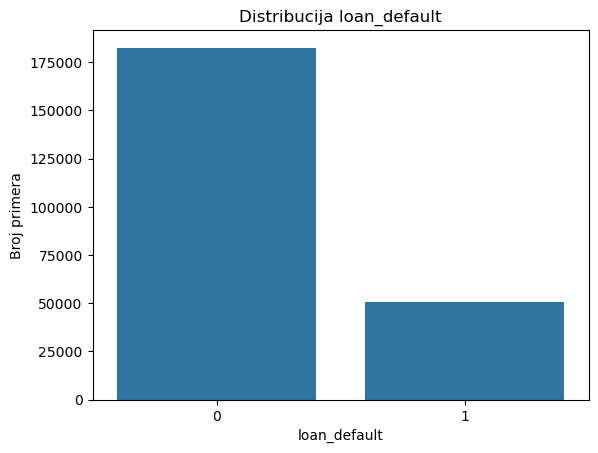

In [6]:
# Vizuelizacija distribucije loan_default
sns.countplot(x='loan_default', data=train)
plt.title('Distribucija loan_default')
plt.xlabel('loan_default')
plt.ylabel('Broj primera')
plt.show()

In [7]:
# Dobijanje tačnog broja instanci za svaku klasu
counts = train['loan_default'].value_counts()
percentages = train['loan_default'].value_counts(normalize=True) * 100

print("Broj instanci za svaku klasu:\n")
print(counts)

print("\n\nProcenat svake od klasa:\n")
print(percentages)

Broj instanci za svaku klasu:

loan_default
0    182543
1     50611
Name: count, dtype: int64


Procenat svake od klasa:

loan_default
0    78.292888
1    21.707112
Name: proportion, dtype: float64



**Disbalans atributa loan_default**

U našem datasetu, izlazni atribut loan_default nije ravnomerno raspoređen; imamo 182543 instanci za vrednost 0 (nezadato) i 50611 instanci za vrednost 1 (zadato). To znači da je naš dataset disbalansiran.

Ovakav disbalans može dovesti do nekoliko problema:

- Model može postati pristrasan ka većinskoj klasi (klasa 0), što može rezultirati visokim procentom tačnih predikcija za većinsku klasu, ali lošom performansom za manjinsku klasu (klasa 1).
- Model može imati lošiju sposobnost generalizacije za primere iz manjinske klase, što može biti kritično u realnim scenarijima gde je predviđanje manjinske klase (npr. detekcija neplaćenih kredita) važnije.

**Opis cene različitih grešaka**

Postoje dve glavne vrste grešaka u klasifikacionim modelima: lažno pozitivne (False Positives) i lažno negativne (False Negatives). U kontekstu loan_default, ove greške imaju različite posledice:

Lažno pozitivne greške (False Positives, FP):

- Šta znači: Model predviđa da će korisnik vratiti kredit (klasa 1), ali korisnik zapravo neće vratiti kredit (klasa 0).
- Posledice: Banka može odobriti kredit korisnicima koji neće vratiti kredit, što može dovesti do finansijskih gubitaka i povećanja rizika.

Lažno negativne greške (False Negatives, FN):

- Šta znači: Model predviđa da korisnik neće vratiti kredit (klasa 0), ali korisnik zapravo hoće vratiti kredit (klasa 1).
- Posledice: Banka može pogrešno odbiti kredit korisnicima koji bi redovno otplaćivali svoje obaveze, što može dovesti do gubitka potencijalnih prihoda i nezadovoljstva klijenata.

**Upravljanje disbalansom klasa**

Da bi se adresirao problem disbalansa klasa, mogu se primeniti sledeći pristupi:

- Reuzorkovanje podataka:
Oversampling manjinske klase: Povećavanje broja instanci klase 1 pomoću tehnika kao što su SMOTE (Synthetic Minority Over-sampling Technique).
Undersampling većinske klase: Smanjenje broja instanci klase 0 kako bi se postigla ravnoteža sa klasom 1.

- Korišćenje ponderisanih metrika:Upotreba metrika kao što su ponderisani F1 skor, ponderisana preciznost i osetljivost koje uzimaju u obzir disbalans klasa.

- Ponderisanje gubitka (Loss weighting): U modelu se mogu primeniti različite težine za greške klase 0 i klase 1 tokom treniranja, kako bi se penalizovale greške za manjinsku klasu.

### Vizualizacija podataka

#### Korelacije

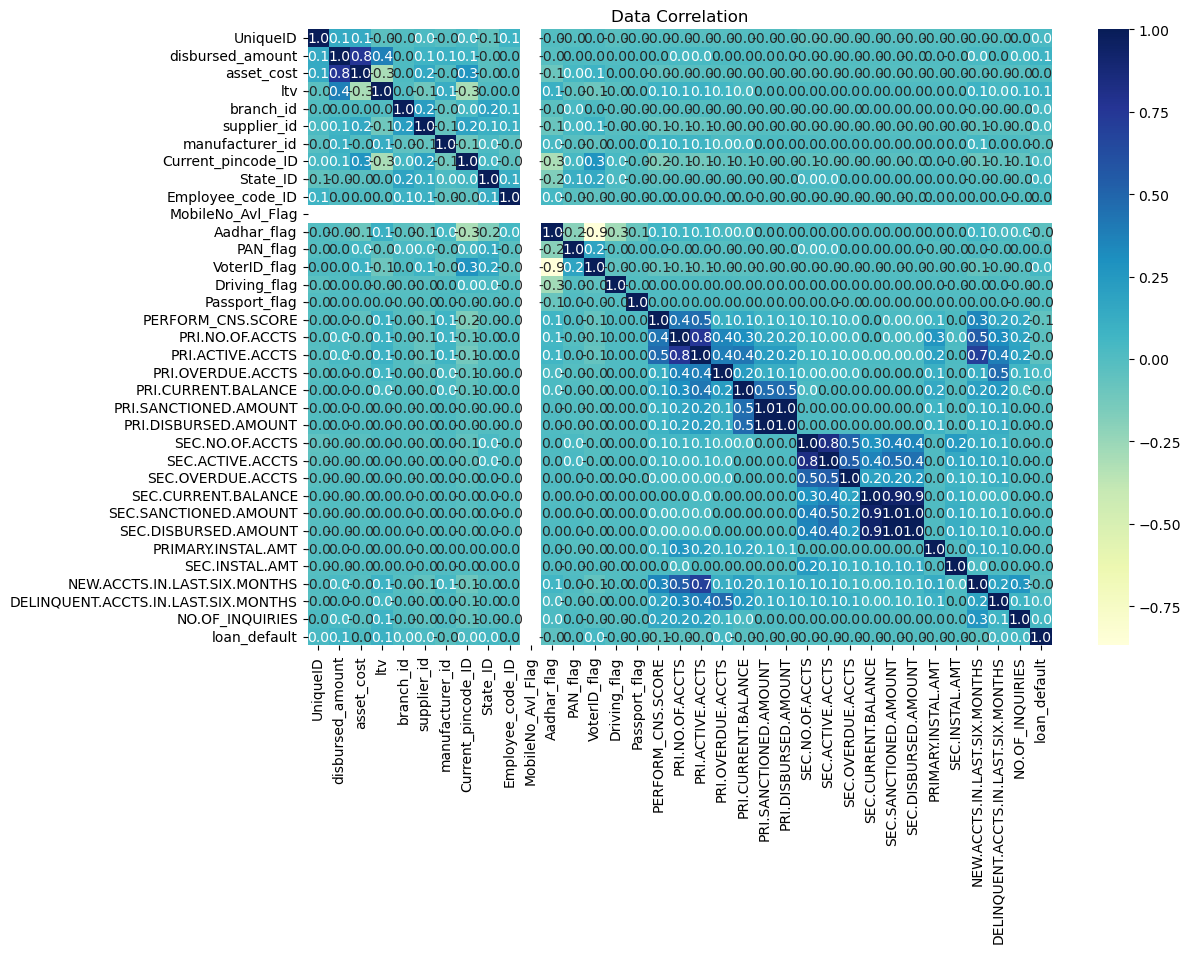

In [8]:
plt.figure(figsize=(12,8))
sns.heatmap(train[num_col].corr(), cmap="YlGnBu", annot=True, fmt=".1f")
plt.title('Data Correlation')
plt.show()

In [9]:
correlation_matrix = train[num_col].corr()
correlation_series = correlation_matrix.unstack()

# Izbaci duplikate
correlation_series = correlation_series[correlation_series.index.map(frozenset).duplicated(keep='first') == False]
filtered_correlation_series = correlation_series[(correlation_series.index.get_level_values(0) != correlation_series.index.get_level_values(1))]

sorted_filtered_correlation_series = filtered_correlation_series.reindex(filtered_correlation_series.abs().sort_values(ascending=False).index)

print("10 najjacih korelacija")
print(sorted_filtered_correlation_series.head(10))


10 najjacih korelacija
SEC.SANCTIONED.AMOUNT  SEC.DISBURSED.AMOUNT            0.999646
PRI.SANCTIONED.AMOUNT  PRI.DISBURSED.AMOUNT            0.998747
SEC.CURRENT.BALANCE    SEC.DISBURSED.AMOUNT            0.929995
                       SEC.SANCTIONED.AMOUNT           0.929196
Aadhar_flag            VoterID_flag                   -0.869259
SEC.NO.OF.ACCTS        SEC.ACTIVE.ACCTS                0.828727
PRI.NO.OF.ACCTS        PRI.ACTIVE.ACCTS                0.753565
disbursed_amount       asset_cost                      0.752668
PRI.ACTIVE.ACCTS       NEW.ACCTS.IN.LAST.SIX.MONTHS    0.702943
PRI.NO.OF.ACCTS        NEW.ACCTS.IN.LAST.SIX.MONTHS    0.537622
dtype: float64


Mozemo da primetimo veoma snaznu korelaciju izmedju:
- *SEC.SANCTIONED.AMOUNT*, tj. ukupnog iznosa koji je odobren za sve sekundarne kredite i *SEC.DISBURSED.AMOUNT*, tj. ukupnog iznosa koji je isplaćen za sve sekundarne kredite. Posto su ova dva atributa fakticki ista, **jednog od njih cemo izbaciti**
- Isto vazi i za
    - *PRI.SANCTIONED.AMOUNT* i *PRI.DISBURSED.AMOUNT*
    - *SEC.CURRENT.BALANCE* i *SEC.DISBURSED.AMOUNT*
    - *SEC.CURRENT.BALANCE* i *SEC.SANCTIONED.AMOUNT*
    - *Aadhar_flag* i *VoterID_flag*

Mozemo da primetimo umerenu snaznu korelaciju izmedju:
- *SEC.NO.OF.ACCTS*, tj. broja sekundarnih kredita koje je korisnik uzeo i *SEC.ACTIVE.ACCTS*, broja aktivnih sekundarnih kredita koje korisnik ima         
- *PRI.NO.OF.ACCTS*, tj. broja primarnih kredita koje je korisnik uzeo i         *PRI.ACTIVE.ACCTS*, broja aktivnih primarnih kredita koje korisnik ima             
- *disbursed_amount*, tj. iznosa kredita koji je odobren i isplaćen korisniku, i      *asset_cost*, cene imovine za koju je kredit uzet
- *PRI.ACTIVE.ACCTS*, broja aktivnih primarnih kredita koje korisnik ima i *NEW.ACCTS.IN.LAST.SIX.MONTHS*, broja novih kredita koje je korisnik uzeo u poslednjih šest meseci


#### Odnosi ostalih atributa sa ciljnim atributom

In [13]:
train['loan_default']

0         0
1         1
2         0
3         1
4         1
         ..
233149    0
233150    0
233151    0
233152    0
233153    0
Name: loan_default, Length: 233154, dtype: int64

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

sns.set_theme(style="whitegrid")

# Try with a subset of categorical columns to debug
subset_cat_col = cat_col[:6]  # Adjust based on the number of categories

# Melt the dataframe
melted_df = pd.melt(train, id_vars='loan_default', value_vars=subset_cat_col)

# Create a FacetGrid with 3 columns and adjusted size
g = sns.FacetGrid(melted_df, col='variable', col_wrap=3, height=4, aspect=1.5, sharex=False, sharey=False)

# Map the histogram plot to each subplot
g.map_dataframe(sns.histplot, x='value', hue='loan_default', multiple='fill', shrink=0.8)

# Adjust the layout and display the plot
plt.tight_layout()

plt.savefig("facet_grid.png")  # Save the plot to a file
plt.show()


In [ ]:
sns.set_theme(style="whitegrid")

# Create a FacetGrid with 2 rows and 5 columns
g = sns.FacetGrid(pd.melt(train, id_vars='loan_default', value_vars=cat_col), col='variable', col_wrap=3, sharex=False, sharey=False)

# Map the bar plot to each subplot
g.map_dataframe(sns.histplot, x='value', hue='loan_default', multiple='fill', shrink=0.8)

# Adjust the layout and display the plot
plt.tight_layout()

plt.show()

In [ ]:
melted_df = df.melt(id_vars=['y'], value_vars=num_col, var_name='variable', value_name='value')

# Set the minimal theme
sns.set_theme(style="whitegrid")

# Create a FacetGrid with 2 rows and 5 columns
g = sns.FacetGrid(melted_df, col='variable', col_wrap=5, sharex=False, sharey=False)

# Map the kdeplot to each subplot
g.map_dataframe(sns.kdeplot, x='value', hue='y', fill=True, common_norm=False, alpha=0.5)

# Adjust the layout and display the plot
plt.tight_layout()
plt.show()

#### Milosevo

Employment_Type
Self employed    187429
Salaried         147013
Name: count, dtype: int64


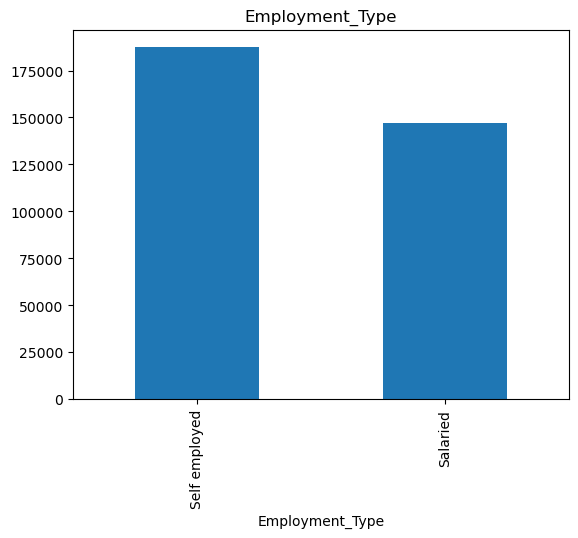

PERFORM_CNS_SCORE_DESCRIPTION
No Bureau History Available                                174843
C-Very Low Risk                                             23870
A-Very Low Risk                                             21683
D-Very Low Risk                                             16472
B-Very Low Risk                                             13696
M-Very High Risk                                            12808
F-Low Risk                                                  12176
K-High Risk                                                 12141
H-Medium Risk                                               10142
E-Low Risk                                                   8393
I-Medium Risk                                                8260
G-Low Risk                                                   5795
J-High Risk                                                  5526
Not Scored: Sufficient History Not Available                 5025
Not Scored: Not Enough Info available on the c

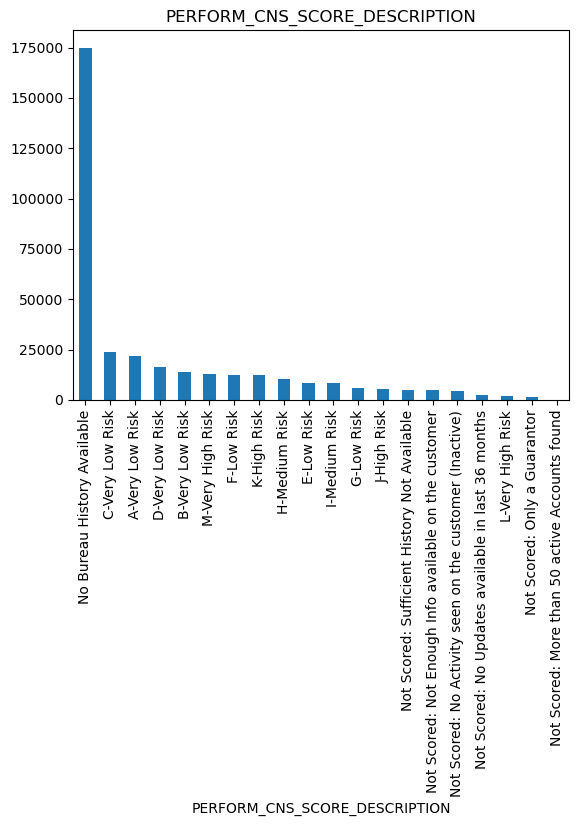

Set
train    233154
test     112392
Name: count, dtype: int64


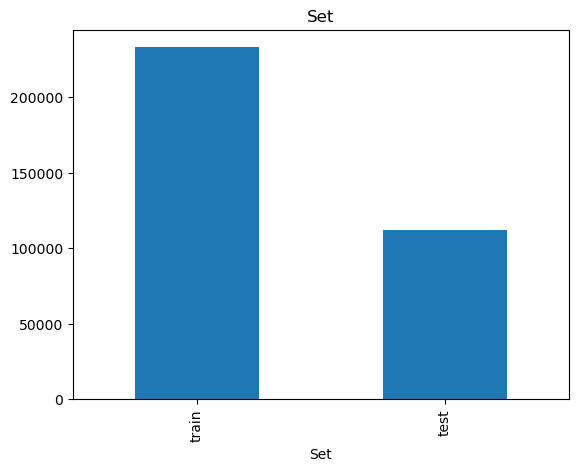

In [18]:
for column in categorical_cols:
    if df[column].nunique() < 50:
        print(df[column].value_counts())
        df[column].value_counts().plot.bar()
        plt.title(column)
        plt.show()

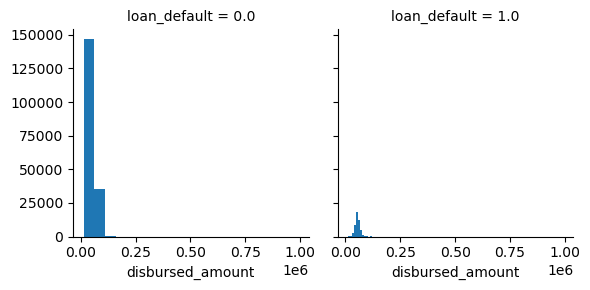

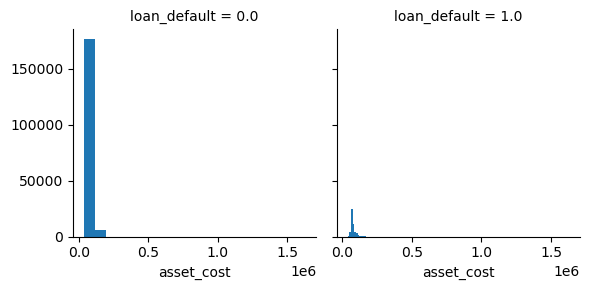

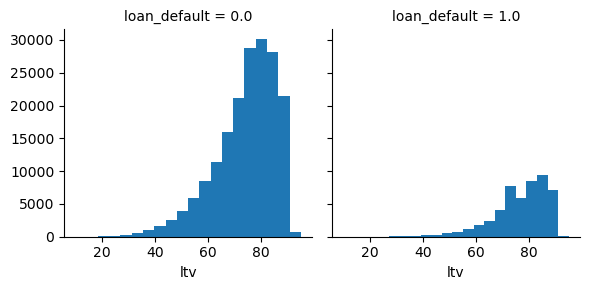

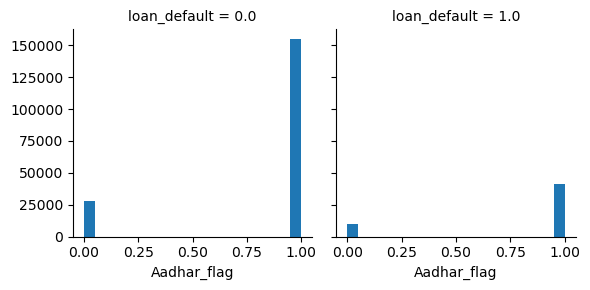

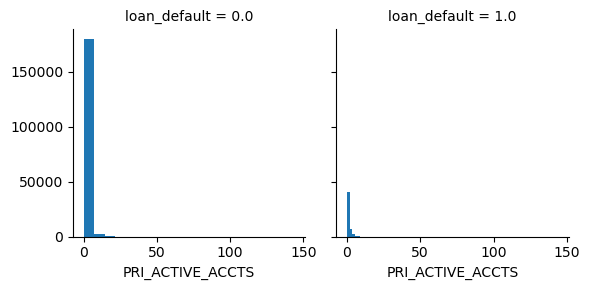

In [20]:
# Numeric Columns of interest
num_interest_cols = ['disbursed_amount','asset_cost', 'ltv', 'Aadhar_flag', 'PRI_ACTIVE_ACCTS']
for column in num_interest_cols:
    g = sns.FacetGrid(df, col='loan_default')
    g.map(plt.hist, column, bins=20)

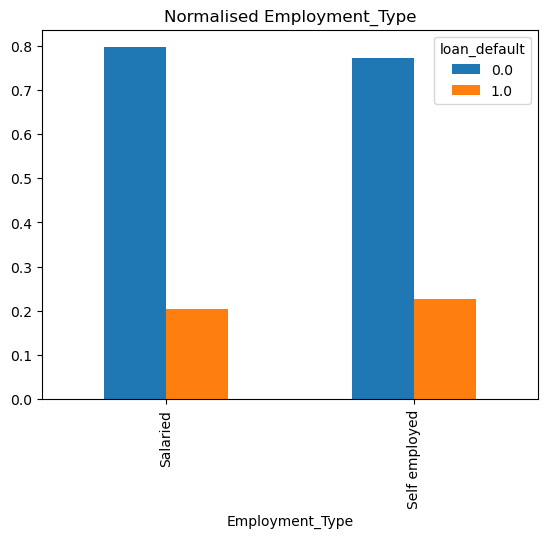

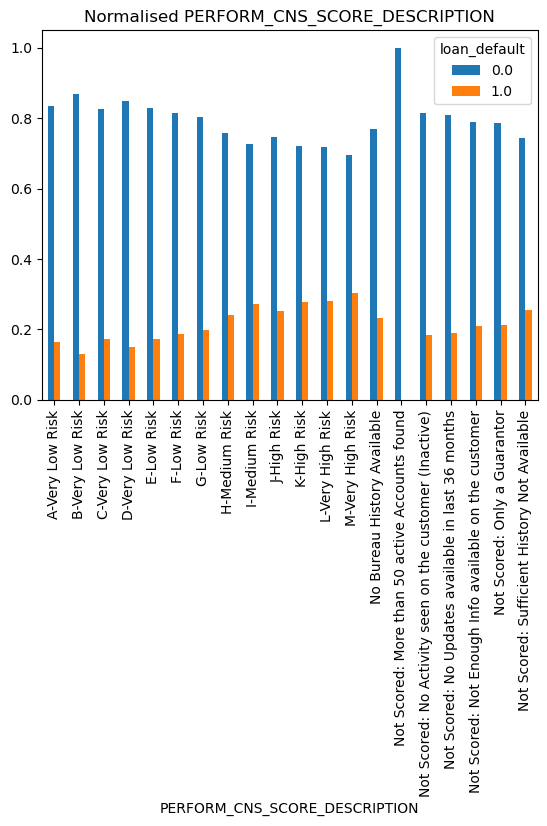

In [21]:
# Categorical Columns of interest
cat_interest_cols = ['Employment_Type', 'PERFORM_CNS_SCORE_DESCRIPTION']
for column in cat_interest_cols:
    df.groupby(column)['loan_default'].value_counts(normalize=True).unstack().plot.bar()
    plt.title(f"Normalised {column}")
    plt.show()

# 3. Priprema podataka

## Izbacivanje nepotrebnih kolona

Stavi komentare za pipelineove

In [68]:
train2 =  train

In [63]:
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.pipeline import Pipeline

Zameniti "." sa "_" u imenima kolona

In [65]:
class ColumnRename (BaseEstimator, TransformerMixin):
    def fit(self, X, y = None):
        return self

    def transform(self, X):
        X.columns = X.columns.str.replace('.', '_', regex=Fabblse)
        return X

Izbaciti nepotrebne kolone

In [66]:
class ColumnDropper (BaseEstimator, TransformerMixin):
    def fit(self, X, y = None):
        return self

    def transform(self, X):
        return X.drop(['UniqueID', 'supplier_id', 'Current_pincode_ID', 
                       'branch_id', 'manufacturer_id', 'Employee_code_ID',
                       'State_ID','SEC_DISBURSED_AMOUNT', 'PRI_DISBURSED_AMOUNT',
                        'SEC_CURRENT_BALANCE', 'VoterID_flag'], axis = 1)

## Nedostajuce vrednosti

In [71]:
train2.isna().sum()

UniqueID                               0
disbursed_amount                       0
asset_cost                             0
ltv                                    0
branch_id                              0
supplier_id                            0
manufacturer_id                        0
Current_pincode_ID                     0
Date_of_Birth                          0
Employment_Type                        0
DisbursalDate                          0
State_ID                               0
Employee_code_ID                       0
MobileNo_Avl_Flag                      0
Aadhar_flag                            0
PAN_flag                               0
VoterID_flag                           0
Driving_flag                           0
Passport_flag                          0
PERFORM_CNS_SCORE                      0
PERFORM_CNS_SCORE_DESCRIPTION          0
PRI_NO_OF_ACCTS                        0
PRI_ACTIVE_ACCTS                       0
PRI_OVERDUE_ACCTS                      0
PRI_CURRENT_BALA

In [67]:
class NAFiller (BaseEstimator, TransformerMixin):
    def fit(self, X, y = None):
        return self

    def transform(self, X):
        X['Employment_Type'] = X['Employment_Type'].fillna('Unknown')
        return X


Odlucili smo se na dodavanje vrednosti "Unknown" umesto brisanja redova sa nedostajućim vrednostima (NaN) iz nekoliko razloga:

- Očuvanje podataka: Brisanje redova može dovesti do gubitka korisnih informacija koje mogu biti važne za analizu ili modeliranje podataka.
- Održavanje konzistentnosti: Dodavanjem "Unknown" kao nove kategorije, održavamo konzistentan format podataka u koloni Employment_Type. 
- Smanjenje uticaja na analizu: Ako je broj redova sa nedostajućim vrednostima relativno mali u poređenju sa ukupnim skupom podataka, dodavanje "Unknown" može biti prihvatljivo kako bi se smanjio uticaj nedostajućih podataka na rezultate analize.

In [ ]:
preprocess_pipe =  Pipeline(
    [ 
    ('renamer', ColumnRename()),
    ('dropper', ColumnDropper()),
    ('nafiller', NAFiller())

    ]
)

In [ ]:
preprocess_pipe.fit_transform(train2)

## Transformacija tipova podataka

Kod ispod menja tipove podataka za određene kolone u DataFrame-u train_df. Evo detaljnog objašnjenja šta svaki deo radi:

Konverzija datuma:
Ovi redovi koda konvertuju kolone Date_of_Birth i DisbursalDate u pandas datetime format. Ovo omogućava lakšu manipulaciju i analizu datuma, kao što su ekstrakcija godine, meseca, dana, itd.

Konverzija u kategorijske tipove:
Ovi redovi koda konvertuju navedene kolone u kategorijske tipove podataka (category). Kategorijske kolone su korisne za kolone koje predstavljaju diskretne vrednosti ili oznake, kao što su ID-ovi, tipovi zaposlenja, opisi, itd.
Kategorijski tip podataka omogućava efikasnije skladištenje podataka i može poboljšati performanse prilikom treniranja modela, jer se koristi manje memorije u poređenju sa tekstualnim tipovima podataka.

Zašto je ovo važno?

- Efikasnost: Konvertovanje kolona koje sadrže ponavljajuće vrednosti (kao što su ID-ovi i opisi) u kategorijske tipove može značajno smanjiti memorijsku potrošnju.
- Brža obrada: Rad sa kategorijskim tipovima podataka je brži, posebno kada se radi sa velikim datasetima. Pandas koristi unutrašnju reprezentaciju koja je optimizovana za ove vrste podataka.
- Analiza podataka: Konvertovanje kolona koje predstavljaju datume u datetime format olakšava rad sa datumima, kao što su filtriranje po datumu, izračunavanje vremenskih razlika, itd.

In [24]:
# change dtype
date_format = '%d-%m-%y'  # Prilagodite ovo prema vašem formatu datuma
df['Date_of_Birth'] = pd.to_datetime(df['Date_of_Birth'], format=date_format)
df['DisbursalDate'] = pd.to_datetime(df['DisbursalDate'], format=date_format)

# Konvertovanje 'Date_of_Birth' u starost
df['Age'] = pd.Timestamp.now().year - df['Date_of_Birth'].dt.year

# Pronalaženje najstarijeg datuma u 'DisbursalDate' i korišćenje kao referentni datum
reference_date = df['DisbursalDate'].min()
df['Days_from_Ref'] = (df['DisbursalDate'] - reference_date).dt.days

# Uklanjanje originalnih kolona datuma
df.drop(columns=['Date_of_Birth', 'DisbursalDate'], inplace=True)

In [25]:
df['branch_id'] = df['branch_id'].astype('category')
df['supplier_id'] = df['supplier_id'].astype('category')
df['manufacturer_id'] = df['manufacturer_id'].astype('category')
df['Current_pincode_ID'] = df['Current_pincode_ID'].astype('category')
df['Employment_Type'] = df['Employment_Type'].astype('category')
df['State_ID'] = df['State_ID'].astype('category')
df['Employee_code_ID'] = df['Employee_code_ID'].astype('category')
df['PERFORM_CNS_SCORE_DESCRIPTION'] = df['PERFORM_CNS_SCORE_DESCRIPTION'].astype('category')

In [26]:
# function to change age string to number of months
def time_to_months(age):
    age_year, age_month  = age.split(' ')
    age_year = int(age_year.replace('yrs', ''))
    age_month = int(age_month.replace('mon', ''))
    return age_year * 12 + age_month

In [27]:
# convert AVERAGE.ACCT.AGE and CREDIT.HISTORY.LENGTH to numeric
df['AVERAGE_ACCT_AGE_MONTHS'] = df['AVERAGE_ACCT_AGE'].apply(time_to_months)
df['CREDIT_HISTORY_LENGTH_MONTHS'] = df['CREDIT_HISTORY_LENGTH'].apply(time_to_months)
# remove transformed cols
df = df.drop(['AVERAGE_ACCT_AGE','CREDIT_HISTORY_LENGTH'], axis=1)

In [28]:
df.nunique()

UniqueID                               345546
disbursed_amount                        29271
asset_cost                              53158
ltv                                      6819
branch_id                                  82
supplier_id                              3089
manufacturer_id                            12
Current_pincode_ID                       7096
Employment_Type                             3
State_ID                                   22
Employee_code_ID                         3398
MobileNo_Avl_Flag                           1
Aadhar_flag                                 2
PAN_flag                                    2
VoterID_flag                                2
Driving_flag                                2
Passport_flag                               2
PERFORM_CNS_SCORE                         574
PERFORM_CNS_SCORE_DESCRIPTION              20
PRI_NO_OF_ACCTS                           114
PRI_ACTIVE_ACCTS                           42
PRI_OVERDUE_ACCTS                 

Uklanjamo atribute koji imaju samo jednu vrednost i atribute bez uticaja na izlaz

In [29]:
# drop where all values same
df = df.drop(['MobileNo_Avl_Flag'], axis=1)

# drop columns no influence to customer
df = df.drop(['UniqueID'], axis=1)


Uklanjanje i izvodjenje atributa ostavljamo za kasnije testove:

In [30]:
# drop columns no influence to customer
# train_df = train_df.drop(['UniqueID', 'supplier_id', 'Current_pincode_ID'], axis=1)

# possibly the following should be removed
# train_df = train_df.drop(['branch_id', 'manufacturer_id', 'Employee_code_ID', 'State_ID'], axis=1)

In [31]:
# move loan_default column to the end of the last column in train df
df = df[[c for c in df if c not in ['loan_default']] + ['loan_default']]

In [32]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 345546 entries, 0 to 112391
Data columns (total 40 columns):
 #   Column                               Non-Null Count   Dtype   
---  ------                               --------------   -----   
 0   disbursed_amount                     345546 non-null  int64   
 1   asset_cost                           345546 non-null  int64   
 2   ltv                                  345546 non-null  float64 
 3   branch_id                            345546 non-null  category
 4   supplier_id                          345546 non-null  category
 5   manufacturer_id                      345546 non-null  category
 6   Current_pincode_ID                   345546 non-null  category
 7   Employment_Type                      345546 non-null  category
 8   State_ID                             345546 non-null  category
 9   Employee_code_ID                     345546 non-null  category
 10  Aadhar_flag                          345546 non-null  int64   
 11  PAN_f

# 4. Treniranje modela i interpretacija rezultata

## Deljenje na trening i test

Odvajamo prethodno spojene skupove

In [33]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report

In [34]:
train_df = df[df['Set'] == 'train'].drop(columns=['Set'])
test_df = df[df['Set'] == 'test'].drop(columns=['Set'])

test_df = test_df.drop(columns=['loan_default'])

In [35]:
X = train_df.drop(columns=['loan_default'])
y = train_df['loan_default']

In [36]:
# Podela skupa podataka na trening i validacioni deo
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

In [37]:
# Definisanje numeričkih i kategorijskih kolona
numeric_features = X.select_dtypes(include=['int64', 'float64']).columns
categorical_features = X.select_dtypes(include=['category']).columns

In [38]:
# Definisanje preprocesorskih koraka za numeričke i kategorijske kolone
numeric_transformer = StandardScaler()
categorical_transformer = OneHotEncoder(handle_unknown='ignore')

In [39]:
# Kombinovanje preprocesorskih koraka koristeći ColumnTransformer
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ])

## Gradient Boosting

In [40]:
from sklearn.ensemble import GradientBoostingClassifier

In [41]:
# Definisanje Pipeline-a za Gradient Boosting model
pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('classifier', GradientBoostingClassifier(random_state=42))
])

In [42]:
# Treniranje modela na trening skupu podataka
pipeline.fit(X, y)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  Index(['disbursed_amount', 'asset_cost', 'ltv', 'Aadhar_flag', 'PAN_flag',
       'VoterID_flag', 'Driving_flag', 'Passport_flag', 'PERFORM_CNS_SCORE',
       'PRI_NO_OF_ACCTS', 'PRI_ACTIVE_ACCTS', 'PRI_OVERDUE_ACCTS',
       'PRI_CURRENT_BALANCE', 'PRI_SANCTIONED_AMOUNT', 'PRI_DISBURSED_AMOUNT',...
       'Days_from_Ref', 'AVERAGE_ACCT_AGE_MONTHS',
       'CREDIT_HISTORY_LENGTH_MONTHS'],
      dtype='object')),
                                                 ('cat',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  Index(['branch_id', 'supplier_id', 'manufacturer_id', 'Current_pincode_ID',
       'Employment_Type', 'State_ID', 'Employee_code_ID',
       'PERFORM_CNS_SCORE_DESCRIPTION'],
      dtype='object'))])),
                ('classifier', GradientBoostingClassifier(random_state=42))])

In [43]:
# Evaluacija modela na validacionom skupu podataka (X_val, y_val)
y_pred = pipeline.predict(X_val)
print("Gradient Boosting Classification Report:")
print(classification_report(y_val, y_pred))

Gradient Boosting Classification Report:
              precision    recall  f1-score   support

         0.0       0.78      1.00      0.88     36477
         1.0       0.66      0.01      0.01     10154

    accuracy                           0.78     46631
   macro avg       0.72      0.50      0.45     46631
weighted avg       0.76      0.78      0.69     46631



## Logisticka regresija

In [44]:
from sklearn.linear_model import LogisticRegression

In [45]:
# Definisanje Pipeline-a za Logističku regresiju
pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('classifier', LogisticRegression(random_state=42))
])

In [46]:
# Treniranje modela na trening skupu podataka
pipeline.fit(X, y)

c:\Users\milos\.conda\envs\anaconda\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  Index(['disbursed_amount', 'asset_cost', 'ltv', 'Aadhar_flag', 'PAN_flag',
       'VoterID_flag', 'Driving_flag', 'Passport_flag', 'PERFORM_CNS_SCORE',
       'PRI_NO_OF_ACCTS', 'PRI_ACTIVE_ACCTS', 'PRI_OVERDUE_ACCTS',
       'PRI_CURRENT_BALANCE', 'PRI_SANCTIONED_AMOUNT', 'PRI_DISBURSED_AMOUNT',...
       'Days_from_Ref', 'AVERAGE_ACCT_AGE_MONTHS',
       'CREDIT_HISTORY_LENGTH_MONTHS'],
      dtype='object')),
                                                 ('cat',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  Index(['branch_id', 'supplier_id', 'manufacturer_id', 'Current_pincode_ID',
       'Employment_Type', 'State_ID', 'Employee_code_ID',
       'PERFORM_CNS_SCORE_DESCRIPTION'],
      dtype='object'))])),
                ('classifier', LogisticRegression(random_state=42))])

In [47]:
# Evaluacija modela na validacionom skupu podataka (X_val, y_val)
y_pred = pipeline.predict(X_val)
print("Logistic Regression Classification Report:")
print(classification_report(y_val, y_pred))

Logistic Regression Classification Report:
              precision    recall  f1-score   support

         0.0       0.79      0.98      0.88     36477
         1.0       0.54      0.07      0.12     10154

    accuracy                           0.78     46631
   macro avg       0.67      0.53      0.50     46631
weighted avg       0.74      0.78      0.71     46631



## KNN

In [48]:
from sklearn.neighbors import KNeighborsClassifier

In [49]:
# Kombinovanje preprocesorskih koraka koristeći ColumnTransformer
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
    ])

In [50]:
# Definisanje Pipeline-a za KNN
pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('classifier', KNeighborsClassifier())
])

In [51]:
# Treniranje modela na trening skupu podataka
pipeline.fit(X, y)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  Index(['disbursed_amount', 'asset_cost', 'ltv', 'Aadhar_flag', 'PAN_flag',
       'VoterID_flag', 'Driving_flag', 'Passport_flag', 'PERFORM_CNS_SCORE',
       'PRI_NO_OF_ACCTS', 'PRI_ACTIVE_ACCTS', 'PRI_OVERDUE_ACCTS',
       'PRI_CURRENT_BALANCE', 'PRI_SANCTIONED_AMOUNT', 'PRI_DISBURSED_AMOUNT',
       'SEC_NO_OF_ACCTS', 'SEC_ACTIVE_ACCTS', 'SEC_OVERDUE_ACCTS',
       'SEC_CURRENT_BALANCE', 'SEC_SANCTIONED_AMOUNT', 'SEC_DISBURSED_AMOUNT',
       'PRIMARY_INSTAL_AMT', 'SEC_INSTAL_AMT', 'NEW_ACCTS_IN_LAST_SIX_MONTHS',
       'DELINQUENT_ACCTS_IN_LAST_SIX_MONTHS', 'NO_OF_INQUIRIES',
       'Days_from_Ref', 'AVERAGE_ACCT_AGE_MONTHS',
       'CREDIT_HISTORY_LENGTH_MONTHS'],
      dtype='object'))])),
                ('classifier', KNeighborsClassifier())])

In [52]:
# Evaluacija modela na validacionom skupu podataka (X_val, y_val)
y_pred = pipeline.predict(X_val)
print("KNN Classification Report:")
print(classification_report(y_val, y_pred))

c:\Users\milos\.conda\envs\anaconda\Lib\site-packages\joblib\externals\loky\backend\context.py:110: UserWarning: Could not find the number of physical cores for the following reason:
[WinError 2] The system cannot find the file specified
Returning the number of logical cores instead. You can silence this warning by setting LOKY_MAX_CPU_COUNT to the number of cores you want to use.
  warnings.warn(
  File "c:\Users\milos\.conda\envs\anaconda\Lib\site-packages\joblib\externals\loky\backend\context.py", line 199, in _count_physical_cores
    cpu_info = subprocess.run(
               ^^^^^^^^^^^^^^^
  File "c:\Users\milos\.conda\envs\anaconda\Lib\subprocess.py", line 548, in run
    with Popen(*popenargs, **kwargs) as process:
         ^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\milos\.conda\envs\anaconda\Lib\subprocess.py", line 1026, in __init__
    self._execute_child(args, executable, preexec_fn, close_fds,
  File "c:\Users\milos\.conda\envs\anaconda\Lib\subprocess.py", line 1538, in 

KNN Classification Report:
              precision    recall  f1-score   support

         0.0       0.82      0.96      0.89     36477
         1.0       0.64      0.27      0.38     10154

    accuracy                           0.81     46631
   macro avg       0.73      0.61      0.63     46631
weighted avg       0.78      0.81      0.78     46631



## Random Forest

In [53]:
from sklearn.ensemble import RandomForestClassifier

In [54]:
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ])

In [55]:
# Definisanje Pipeline-a za RandomForestClassifier
pipeline_rf = Pipeline([
    ('preprocessor', preprocessor),
    ('classifier', RandomForestClassifier(random_state=42))
])

In [56]:
# Treniranje modela na trening skupu podataka
pipeline_rf.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  Index(['disbursed_amount', 'asset_cost', 'ltv', 'Aadhar_flag', 'PAN_flag',
       'VoterID_flag', 'Driving_flag', 'Passport_flag', 'PERFORM_CNS_SCORE',
       'PRI_NO_OF_ACCTS', 'PRI_ACTIVE_ACCTS', 'PRI_OVERDUE_ACCTS',
       'PRI_CURRENT_BALANCE', 'PRI_SANCTIONED_AMOUNT', 'PRI_DISBURSED_AMOUNT',...
       'Days_from_Ref', 'AVERAGE_ACCT_AGE_MONTHS',
       'CREDIT_HISTORY_LENGTH_MONTHS'],
      dtype='object')),
                                                 ('cat',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  Index(['branch_id', 'supplier_id', 'manufacturer_id', 'Current_pincode_ID',
       'Employment_Type', 'State_ID', 'Employee_code_ID',
       'PERFORM_CNS_SCORE_DESCRIPTION'],
      dtype='object'))])),
                ('classifier', RandomForestClassifier(random_state=42))])

In [57]:
# Evaluacija modela na validacionom skupu podataka (X_val, y_val)
y_pred_rf = pipeline_rf.predict(X_val)

print("Random Forest Classifier Classification Report:")
print(classification_report(y_val, y_pred_rf))

Random Forest Classifier Classification Report:
              precision    recall  f1-score   support

         0.0       0.79      0.98      0.87     36477
         1.0       0.40      0.05      0.08     10154

    accuracy                           0.78     46631
   macro avg       0.60      0.51      0.48     46631
weighted avg       0.70      0.78      0.70     46631



# 5. Konacni rezultati i zakljucak